In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

# MNISTデータセットを取得
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)

# データ番号を指定
n = 0

# 画像とラベルデータを取得
# 訓練画像6000枚の内の150~160番目の画像の初めのピクセルを表示している
x = x_train[n] # サイズ(60000, 784)
t = t_train[n] # サイズ(60000,) = (1, 60000)
print(x[150:160])
print(x.shape) # 28×28ピクセルを1次元配列に変換した
print(t)

[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079]
(784,)
5


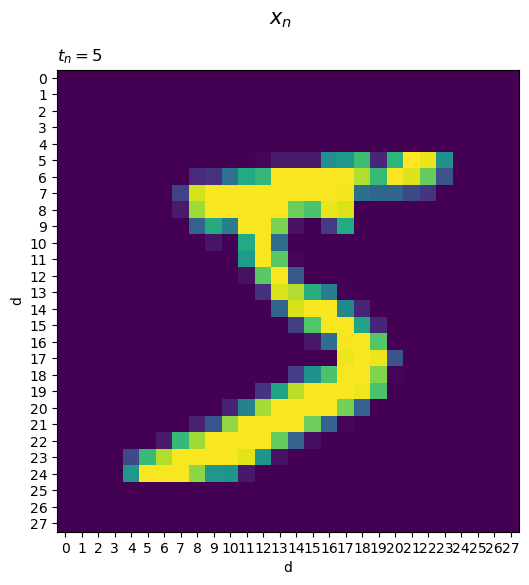

In [7]:
# 手書き数字を描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6)) # 図の設定
ax.pcolor(x.reshape((28, 28))) # ヒートマップ
ax.set_xlabel('d') # x軸ラベル
ax.set_xticks(np.arange(28) + 0.5) # x軸の目盛位置
ax.set_xticklabels(np.arange(28)) # x軸目盛
ax.set_ylabel('d') # y軸ラベル
ax.set_yticks(np.arange(28) + 0.5) # y軸の目盛位置
ax.set_yticklabels(np.arange(28)) # y軸目盛
ax.set_title('$t_n=' + str(t) + '$', loc='left') # タイトル
fig.suptitle('$x_n$', fontsize=15) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
ax.set_aspect('equal', adjustable='box') # アスペクト比
plt.show()

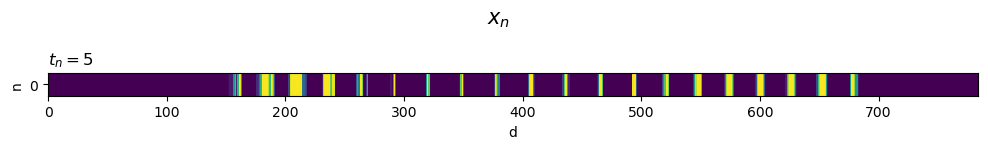

In [8]:
# xを1次元配列の状態で描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 0.3)) # 図の設定
ax.pcolor(x.reshape((1, 784))) # ヒートマップ
ax.set_xlabel('d') # x軸ラベル
ax.set_ylabel('n') # y軸ラベル
ax.set_yticks([0.5]) # y軸の目盛位置
ax.set_yticklabels([0]) # y軸目盛
ax.set_title('$t_n=' + str(t) + '$', loc='left') # タイトル
fig.suptitle('$x_n$', fontsize=15, y=3) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
plt.show()

In [9]:
# 一つずつ取り出さずバッチサイズごとに取り出す
# バッチサイズを指定
N = 9

# 画像とラベルデータを取得
X = x_train[:N]
T = t_train[:N]
print(X[:, 150:155])
print(X.shape)
print(T)
print(T.shape)

[[0.         0.         0.01176471 0.07058824 0.07058824]
 [0.         0.         0.         0.         0.1882353 ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.1254902  0.92941177 0.99215686 0.9882353 ]
 [0.         0.14901961 0.16862746 0.4117647  1.        ]
 [0.         0.         0.01960784 0.24705882 0.77254903]]
(9, 784)
[5 0 4 1 9 2 1 3 1]
(9,)


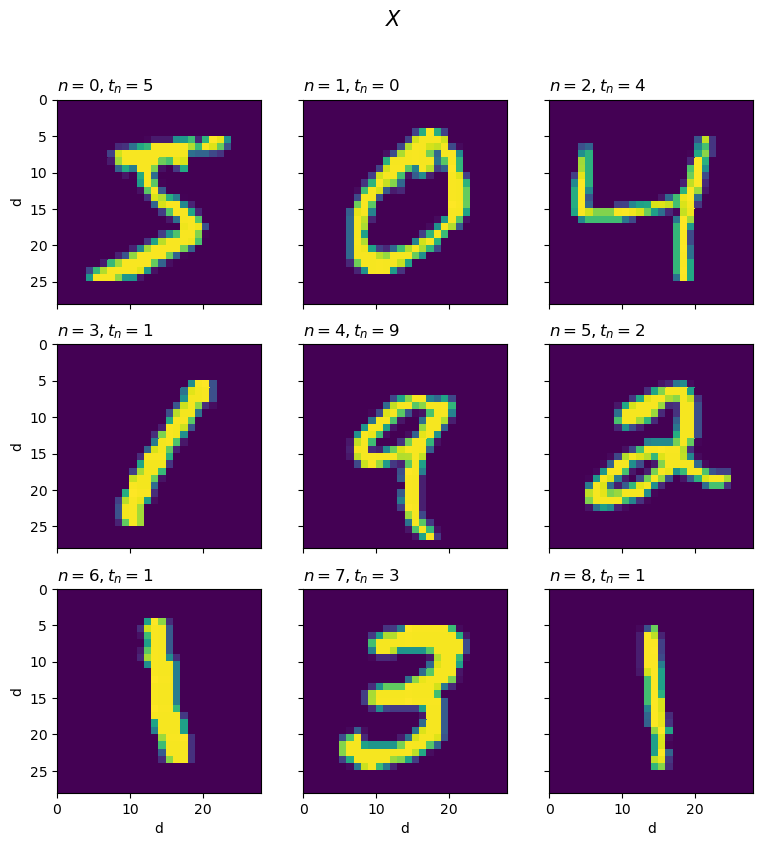

In [10]:
# データごとに手書き数字を描画
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9)) # 図の設定
for n, ax in enumerate(axs.flat):
    ax.pcolor(X[n].reshape((28, 28))) # ヒートマップ
    ax.set_xlabel('d') # x軸ラベル
    ax.set_ylabel('d') # y軸ラベル
    ax.label_outer() # 外側のラベルのみ表示
    ax.set_title('$n=' + str(n) + ', t_n=' + str(T[n]) + '$', loc='left') # タイトル
    ax.set_aspect('equal', adjustable='box') # アスペクト比
    ax.invert_yaxis() # y軸を反転
fig.suptitle('$X$', fontsize=15) # 全体のタイトル
plt.show()

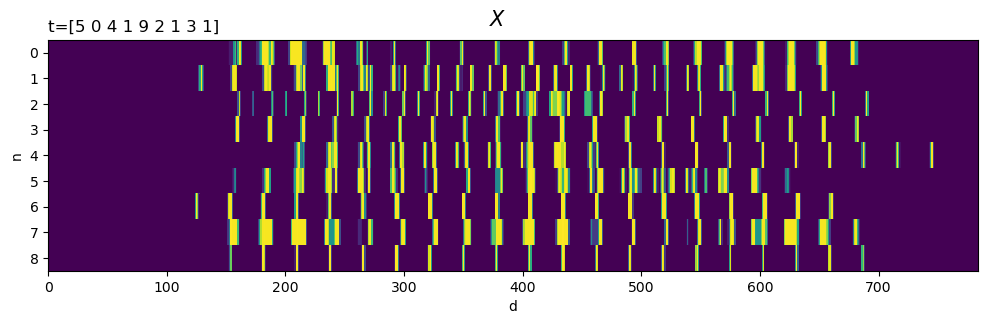

In [11]:
# xを1次元配列の状態で描画 (バッチサイズ9)
# 各数字ごとで見ると2,4のばらつきがあるらしい
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3)) # 図の設定
ax.pcolor(X) # ヒートマップ
ax.set_xlabel('d') # x軸ラベル
ax.set_ylabel('n') # y軸ラベル
ax.set_yticks(np.arange(N) + 0.5) # y軸の目盛位置
ax.set_yticklabels(np.arange(N)) # y軸目盛
#ax.set_yticklabels(['$' + str(n) + '\ (t_n=' + str(T[n]) + ')$' for n in range(N)]) # y軸目盛:(正解ラベルを表示)
ax.set_title('t=' + str(T), loc='left') # タイトル
fig.suptitle('$X$', fontsize=15) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
plt.show()

In [4]:
# 重みを作成 データセット全体において784ピクセルごとに数字の平均をとる 
W = np.zeros((784, 10))
for k in range(10):
    W[:, k] = np.mean(x_train[t_train == k], axis=0)
print(W[150:155, :5])
print(W.shape)

[[0.09442687 0.01412742 0.36298302 0.3829734  0.06451192]
 [0.17172489 0.04140154 0.46316317 0.48024842 0.0734271 ]
 [0.27210975 0.10478874 0.54724389 0.55877799 0.07602418]
 [0.38963154 0.20477685 0.61027074 0.61324334 0.06785146]
 [0.49186763 0.29759428 0.64457238 0.62329566 0.06074872]]
(784, 10)


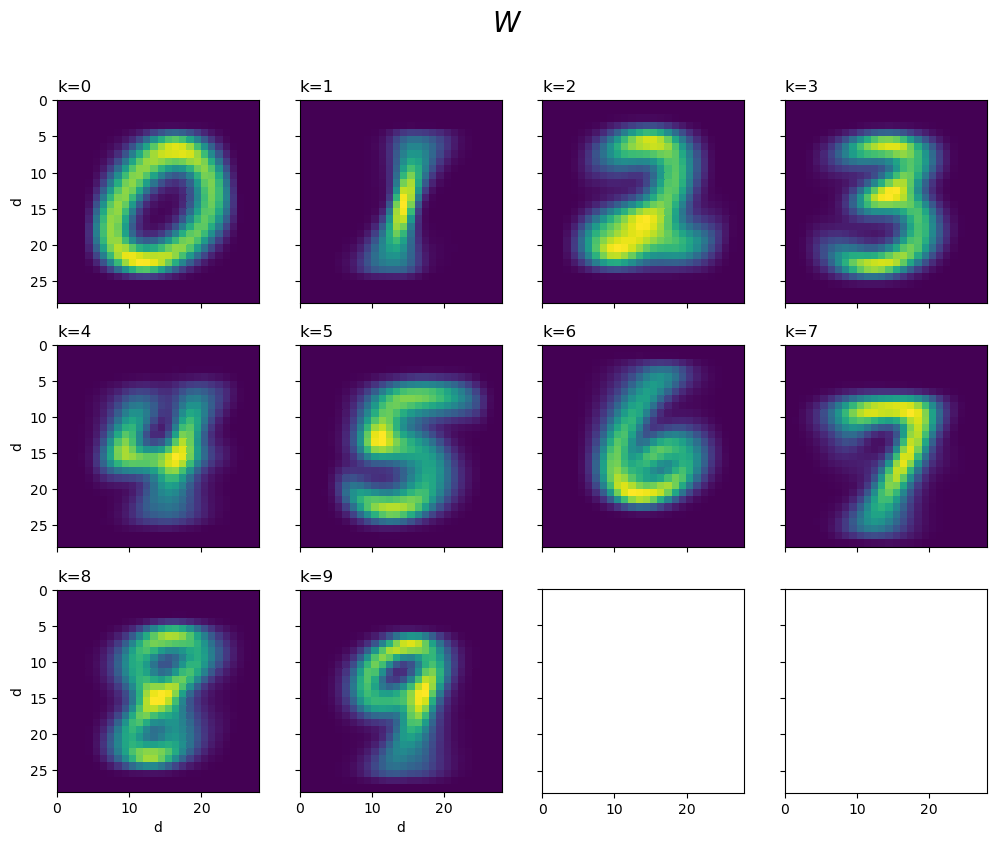

In [14]:
# クラスごとに重みを描画
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), sharex=True, sharey=True)
for k in range(10):
    ax = axs.flat[k] # k番目のクラスの図
    ax.pcolor(W[:, k].reshape((28, 28))) # ヒートマップ
    ax.set_xlabel('d') # x軸ラベル
    ax.set_ylabel('d') # y軸ラベル
    ax.label_outer() # 外側のラベルのみ表示
    ax.set_title('k=' + str(k), loc='left') # タイトル
    ax.set_aspect('equal', adjustable='box') # アスペクト比
fig.suptitle('$W$', fontsize=20) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
plt.show()

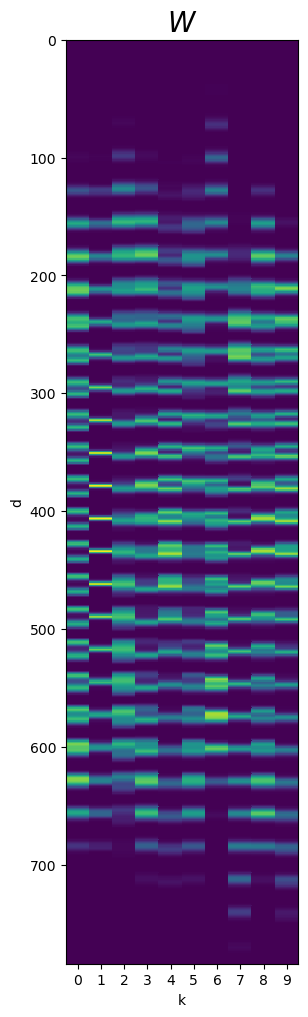

In [15]:
# 処理上の重みを描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 12)) # 図の設定
ax.pcolor(W) # ヒートマップ
ax.set_xlabel('k') # x軸ラベル
ax.set_xticks(np.arange(10) + 0.5) # x軸の目盛位置
ax.set_xticklabels(np.arange(10)) # x軸目盛
ax.set_ylabel('d') # y軸ラベル
ax.set_title('$W$', fontsize=20) # タイトル
ax.invert_yaxis() # y軸を反転
plt.show()

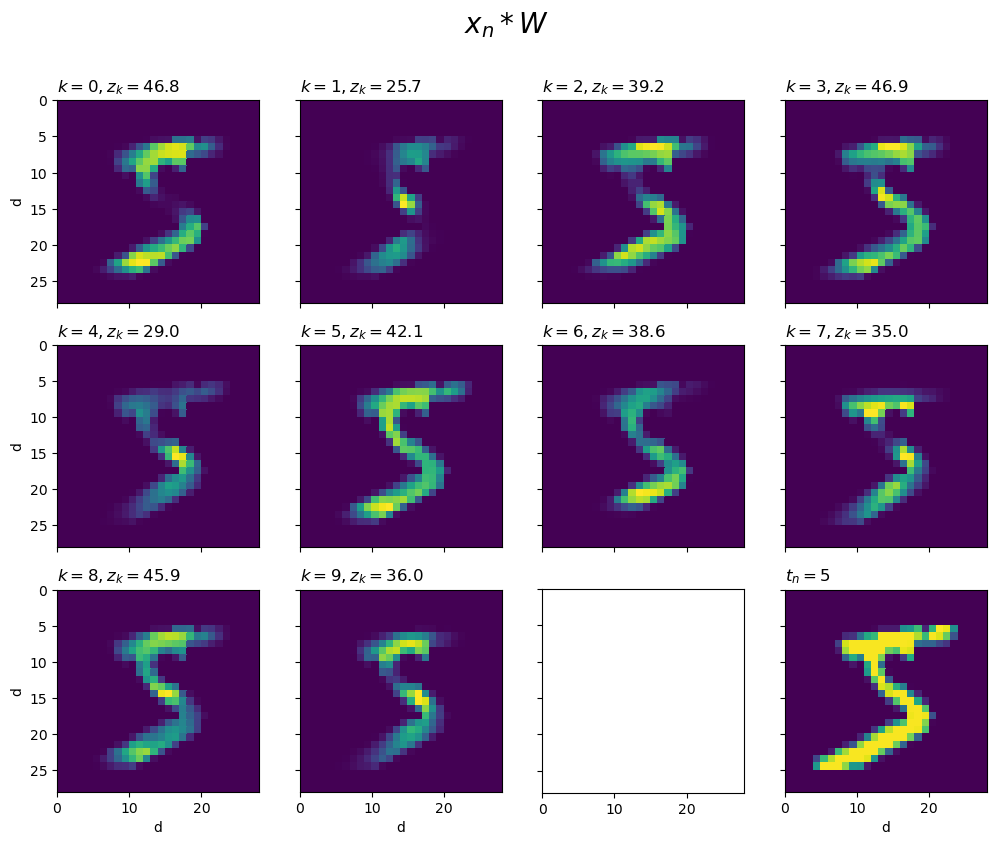

In [5]:
# 重み付き入力
# データ番号を指定
n = 0

# 画像とラベルデータを取得
x = x_train[n]
t = t_train[n]

# 図の設定
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12,9), sharex=True, sharey=True)

# クラスごとに重み付き入力を描画
for k in range(10):
    ax = axs.flat[k]
    ax.pcolor((x * W[:, k]).reshape((28,28))) # 重み付けした入力データ
    ax.set_xlabel('d') # x軸ラベル
    ax.set_ylabel('d') # y軸ラベル
    ax.label_outer() # 外側のラベルのみ表示
    ax.set_title('$k=' + str(k) + ', z_k=' + str(np.round(np.sum(x * W[:, k]), 1)) + '$', loc='left') # タイトル
    ax.set_aspect('equal', adjustable='box') # アスペクト比

# 入力データを作図
ax = axs.flat[11]
ax.pcolor(x.reshape((28,28))) # 元の入力データ
ax.set_xlabel('d') # x軸ラベル
ax.set_ylabel('d') # y軸ラベル
ax.label_outer() # 外側のラベルのみ表示
ax.set_title('$t_n=' + str(t) + '$', loc='left') # タイトル
ax.set_aspect('equal', adjustable='box') # アスペクト比

fig.suptitle('$x_n * W$', fontsize=20) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
plt.show()

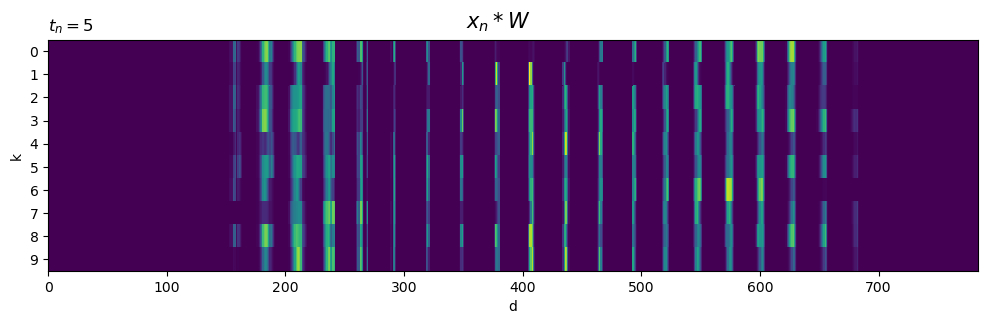

In [6]:
# 処理上の重み付き入力を描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3)) # 図の設定
ax.pcolor(x.reshape((1, 784)) * W.T) # ヒートマップ
ax.set_xlabel('d') # x軸ラベル
ax.set_ylabel('k') # y軸ラベル
ax.set_yticks(np.arange(10) + 0.5) # y軸の目盛位置
ax.set_yticklabels(np.arange(10)) # y軸目盛
ax.set_title('$t_n=' + str(t) + '$', loc='left') # タイトル
fig.suptitle('$x_n * W$', fontsize=15) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
plt.show()

In [7]:
# 1データの場合
n = 0

# 画像とラベルデータを取得
x = x_train[n]
t = t_train[n] #答えは5

# 重み付き和を計算
z = np.dot(x.reshape((1, 784)), W)
print(np.round(z, 1))
print(z.shape)

[[46.8 25.7 39.2 46.9 29.  42.1 38.6 35.  45.9 36. ]]
(1, 10)


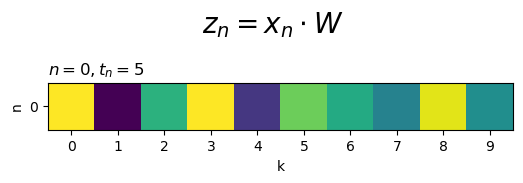

In [8]:
# 重み付き和を描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2)) # 図の設定
ax.pcolor(z) # ヒートマップ
ax.set_xlabel('k') # x軸ラベル
ax.set_xticks(np.arange(10) + 0.5) # x軸目盛の位置
ax.set_xticklabels(np.arange(10)) # x軸目盛
ax.set_ylabel('n') # y軸ラベル
ax.set_yticks([0.5]) # y軸目盛の位置
ax.set_yticklabels([0]) # y軸目盛
ax.set_title('$n=' + str(n) + ', t_n=' + str(t) + '$', loc='left') # タイトル
fig.suptitle('$z_n = x_n \cdot W$', fontsize=20) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
ax.set_aspect('equal', adjustable='box') # アスペクト比
plt.show()

In [9]:
# バッチサイズを指定
N = 20

# 画像とラベルデータを取得
X = x_train[:N]
T = t_train[:N]

# 重み付き和を計算
Z = np.dot(X, W)
print(np.round(Z[:5], 1))
print(Z.shape)

[[46.8 25.7 39.2 46.9 29.  42.1 38.6 35.  45.9 36. ]
 [72.3 21.3 39.8 41.4 31.2 42.9 41.3 32.7 43.8 35. ]
 [21.5  5.8 20.  19.6 24.9 16.5 20.1 15.6 20.1 21. ]
 [21.2 29.6 30.9 27.2 20.9 22.  21.5 19.2 35.3 21.2]
 [34.8 24.9 32.1 31.5 40.8 32.  33.1 37.3 41.6 45.9]]
(20, 10)


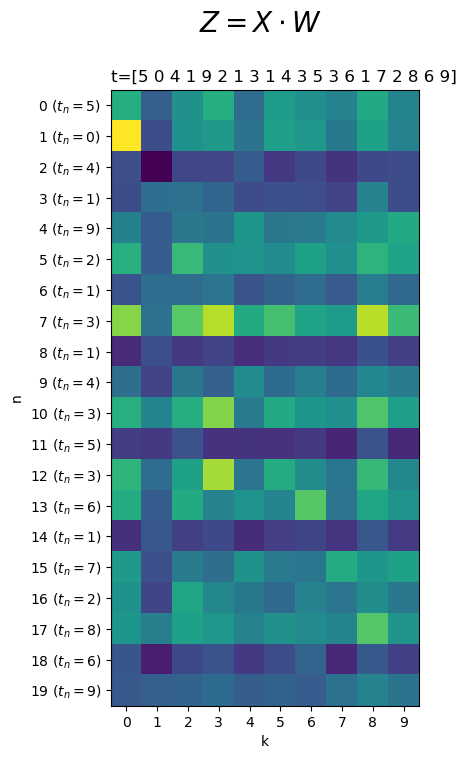

In [10]:
# Z(3,4)なら 3番目の入力データとクラス4に関する重みの内積を見ている
# 重み付き和を描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 8)) # 図の設定
ax.pcolor(Z) # ヒートマップ
ax.set_xlabel('k') # x軸ラベル
ax.set_xticks(np.arange(10) + 0.5) # x軸目盛位置
ax.set_xticklabels(np.arange(10)) # x軸目盛
ax.set_ylabel('n') # y軸ラベル
ax.set_yticks(np.arange(N) + 0.5) # y軸目盛の位置
ax.set_yticklabels(['$' + str(n) + '\ (t_n=' + str(T[n]) + ')$' for n in range(N)]) # y軸目盛:(正解ラベルを表示)
ax.set_title('t=' + str(T), loc='left') # タイトル
fig.suptitle('$Z = X \cdot W$', fontsize=20) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
ax.set_aspect('equal', adjustable='box') # アスペクト比
plt.show()

In [13]:
# ソフトマックス関数による活性化(正規化)
Y = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
print(np.round(Y, 3))
print(Y.shape)

[[0.403 0.    0.    0.427 0.    0.004 0.    0.    0.165 0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.033 0.    0.007 0.005 0.92  0.    0.008 0.    0.008 0.02 ]
 [0.    0.003 0.013 0.    0.    0.    0.    0.    0.984 0.   ]
 [0.    0.    0.    0.    0.007 0.    0.    0.    0.013 0.98 ]
 [0.052 0.    0.821 0.    0.    0.    0.001 0.    0.124 0.002]
 [0.    0.01  0.008 0.097 0.    0.001 0.008 0.    0.873 0.003]
 [0.004 0.    0.    0.406 0.    0.    0.    0.    0.59  0.   ]
 [0.    0.322 0.003 0.028 0.    0.003 0.006 0.002 0.625 0.011]
 [0.    0.    0.004 0.    0.765 0.    0.019 0.    0.202 0.01 ]
 [0.    0.    0.    0.997 0.    0.    0.    0.    0.003 0.   ]
 [0.004 0.002 0.542 0.    0.    0.    0.002 0.    0.449 0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.472 0.002 0.017 0.    0.001 0.006 0.    0.501 0.001]
 [0.007 0.    0.    0.    0.001 0.    0.    0.935 0.003

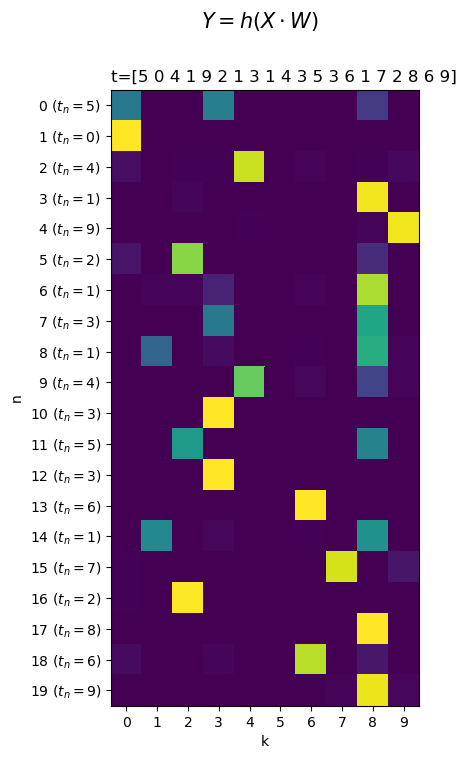

In [12]:
# 出力データを描画
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 8)) # 図の設定
ax.pcolor(Y) # ヒートマップ
ax.set_xlabel('k') # x軸ラベル
ax.set_xticks(np.arange(10) + 0.5) # x軸目盛位置
ax.set_xticklabels(np.arange(10)) # x軸目盛
ax.set_ylabel('n') # y軸ラベル
ax.set_yticks(np.arange(N) + 0.5) # y軸目盛位置
ax.set_yticklabels(['$' + str(n) + '\ (t_n=' + str(T[n]) + ')$' for n in range(N)]) # y軸目盛:(正解ラベルを表示)
ax.set_title('t=' + str(T), loc='left') # タイトル
fig.suptitle('$Y = h(X \cdot W)$', fontsize=15) # 全体のタイトル
ax.invert_yaxis() # y軸を反転
ax.set_aspect('equal', adjustable='box') # アスペクト比
plt.show()

In [14]:
# 推論結果を表示
print(np.argmax(Z, axis=1))
print(T)

# 推論結果を比較
print(np.argmax(Z, axis=1) == T)

# 正解率を計算
print(np.sum(np.argmax(Z, axis=1) == T) / N)

[3 0 4 8 9 2 8 8 8 4 3 2 3 6 8 7 2 8 6 8]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[False  True  True False  True  True False False False  True  True False
  True  True False  True  True  True  True False]
0.6
